In [1]:
# initial imports

import torch

import matplotlib.pyplot as plt

## 1. Different types of tensors using pytorch

1. empty tensor - uninitialized.  the tensor dimensions can be specified, but it's empty.

`torch.empty(DIMENSIONS)`
2. randomly initialized tensor

`torch.rand(DIMENSIONS)`
3. tensor initialized with zeros

`torch.zeros(DIMENSIONS)`
4. tensor initialized with ones

`torch.ones(DIMENSIONS)`
5. randomly initialized with normal distribution random numbers $\mathcal{N} (\mu = 0, \sigma^2 = 1)$

`torch.randn_like(DIMENSIONS)` $\rightarrow$ we can initialize using `_like()` functions

Let's try random initialization with normal distribution in 5.  Given a tensor, `randn_like` will initialize that function with normal distribution.

In [2]:
x = torch.ones(2000)

In [3]:
x_randn = torch.randn_like(x)

To make sure, we can try to plot the distribution.

In [4]:
sorted_x, sorted_indices = x_randn.sort()

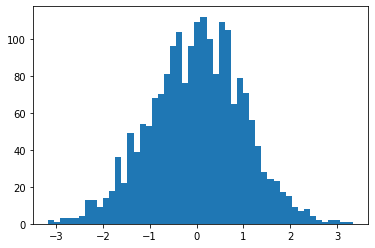

In [5]:
plt.hist(sorted_x, bins = 50)
plt.show()

cool.  I'm better convinced that this is normally random.

## 2. Operations

1. [Addition](#addition)
2. [in-place operations](#in-place-operations)
3. [mathematical operations](#mathematical-operations)
4. [broadcasting](#broadcasting)
5. [matrix multiplication](#matrix-multiplication)
    - dot product
    - matrix product
6. changing dimensions


<a id='addition'></a>
### 2.1 Addition 

First, we define a couple tensors for our purposes. 

In [6]:
x = torch.randn(2,3,1,2)

In [7]:
x

tensor([[[[ 0.8049, -0.0204]],

         [[ 0.2558, -0.8377]],

         [[-0.1351,  0.5858]]],


        [[[ 1.3349,  0.6151]],

         [[ 1.2394,  1.4540]],

         [[ 0.3045, -0.9893]]]])

Taking a look at this, let's break down the dimensions and count.

```
tensor([
        [    
             [   [ 1.1677,  0.2297]   ],

             [   [-0.5983,  1.2568]   ],

             [   [-1.2132,  0.0813]   ]
        ],


        [    
             [   [-0.4010,  0.4659]   ],

             [   [ 1.2019,  0.5684]   ],

             [   [ 0.5998,  0.2074]   ]
        ]
       ])
```
Spacing out to make clear how dimensions are represented in pytorch.  Note that the $3^{rd}$ dimension is not represented, since it's 1.

Now we define couple more vectors.

In [8]:
y = torch.randn(2,3,1,2)
z = torch.randn(2,3,2  )
a = torch.randn(  3,1,2)
b = torch.randn(2,3,1  )

We can use various representation to add two tensors: `+`, `torch.add(tensor)`

In [9]:
x+y

tensor([[[[ 2.1516, -0.3126]],

         [[-0.8538,  0.1927]],

         [[ 0.3149,  0.9242]]],


        [[[ 1.3320,  2.0967]],

         [[ 0.3307,  4.0127]],

         [[-0.4137, -1.6834]]]])

In [10]:
y+x

tensor([[[[ 2.1516, -0.3126]],

         [[-0.8538,  0.1927]],

         [[ 0.3149,  0.9242]]],


        [[[ 1.3320,  2.0967]],

         [[ 0.3307,  4.0127]],

         [[-0.4137, -1.6834]]]])

In [11]:
x.add(y)

tensor([[[[ 2.1516, -0.3126]],

         [[-0.8538,  0.1927]],

         [[ 0.3149,  0.9242]]],


        [[[ 1.3320,  2.0967]],

         [[ 0.3307,  4.0127]],

         [[-0.4137, -1.6834]]]])

<a id= in-place-operations></a>
### 2.2 In-place operations

Sometimes we want to operate on a tensor and modify it.  This can be done using `_`.  To do this, we first make a copy of a tensor using `tensor.clone()` method. 

In [12]:
x_copy = x.clone()

In [13]:
x_copy

tensor([[[[ 0.8049, -0.0204]],

         [[ 0.2558, -0.8377]],

         [[-0.1351,  0.5858]]],


        [[[ 1.3349,  0.6151]],

         [[ 1.2394,  1.4540]],

         [[ 0.3045, -0.9893]]]])

Then, we do an in-place operation to add `x_copy` and `y`

In [14]:
x_copy.add_(y)

tensor([[[[ 2.1516, -0.3126]],

         [[-0.8538,  0.1927]],

         [[ 0.3149,  0.9242]]],


        [[[ 1.3320,  2.0967]],

         [[ 0.3307,  4.0127]],

         [[-0.4137, -1.6834]]]])

Now, we see that this tensor is modified

In [15]:
x_copy

tensor([[[[ 2.1516, -0.3126]],

         [[-0.8538,  0.1927]],

         [[ 0.3149,  0.9242]]],


        [[[ 1.3320,  2.0967]],

         [[ 0.3307,  4.0127]],

         [[-0.4137, -1.6834]]]])

However, the original tensor is un-modified.

In [16]:
x

tensor([[[[ 0.8049, -0.0204]],

         [[ 0.2558, -0.8377]],

         [[-0.1351,  0.5858]]],


        [[[ 1.3349,  0.6151]],

         [[ 1.2394,  1.4540]],

         [[ 0.3045, -0.9893]]]])

Other types of in-place operations:

- `abs_()`
- `acos_()`: inverse cosine of input and then save to the variable.
- `addmm_(input-matrix, m1, m2)`: matrix multiply `m1` and `m2`, then add to `input-matrix`.

... etc.

<a id=mathematical-operations></a>
### 2.3 Mathematical Operations

#### Pointwise Ops

- bitwise ops: `torch.bitwise_not`, `torch.bitwise_xor`
- `torch.clamp(input, min, max)`: "clamp" all elements to range of \[`min`, `max`\].
- `torch.ceil(input)`: returns the closest highest integer ceiling of all elements
- `torch.floor(input)`: returns the closest lowest integer floor of all elements
- `torch.div`: btw, if you want to do integer div, you can typecast the tensors to int
- `torch.erf`, `torch.erfc`: error functions
- `torch.exp`, `torch.log`, `torch.log10`, `torch.log2`: just log is natural log
- `torch.mul(input, other, out = None)`: $out^*_i = other \times input_i$
- `torch.neg(input)`: change signs of input
- `torch.pow()`: exponentials, element-wise
- `torch.reciprocal()`: returns 1/input, element-wise
- `torch.sin()`,`torch.tanh()`,`torch.sinh()`,`torch.cosh()`: trig functions, element-wise
- `torch.sqrt()`
- `torch.sigmoid()`


#### Reduction Ops
- `torch.argmin`,`torch.argmax`,`torch.min`,`torch.max` 
- `torch.mean`, `torch.median`, `torch.mode`
- `torch.prod`: product of all elements in a tensor
- `torch.sum`: sum of all elements in a tensor
- `torch.unique`: tensor of all the unique elements in input tensor
- `torch.argsort`, `torch.sort`


#### Comparison Ops
- `torch.eq`: element-wise equality
- `torch.equal`: tensor-wise equality
- `torch.le`, `torch.ge`, `torch.gt`: element-wise comparisons -> tensor of bools
- `torch.topk(input,largest=True)`: topk elements


#### Spectral Ops
This part mostly contains Fourier transforms. Might be useful for Computer Vision, but will not go over this at this time.

Let's try a few of these functions.  I'm gonna start with **divisions**.

In [17]:
u = torch.randint(0,10,(10,))
v = torch.randint(0,10,(10,))
print("u: ",u)
print("v: ",v)

u.div(v)

u:  tensor([6, 6, 5, 6, 0, 4, 2, 3, 4, 3])
v:  tensor([5, 6, 3, 2, 3, 6, 7, 2, 8, 8])


tensor([1, 1, 1, 3, 0, 0, 0, 1, 0, 0])

In [18]:
u = u.float()
v = v.float()
print("u: ",u)
print("v: ",v)

u.div(v)

u:  tensor([6., 6., 5., 6., 0., 4., 2., 3., 4., 3.])
v:  tensor([5., 6., 3., 2., 3., 6., 7., 2., 8., 8.])


tensor([1.2000, 1.0000, 1.6667, 3.0000, 0.0000, 0.6667, 0.2857, 1.5000, 0.5000,
        0.3750])

Now, we're gonna try **sorting**.

Sorting is operated along given dimensions.  If dimension not given, then it will pick the last dimension of input.
First, we figure out how x looks like, and what the dimension of this vector is.

In [25]:
print("dimensions: ",x.size())
print("print the tensor:\n",x)

dimensions:  torch.Size([2, 3, 1, 2])
print the tensor:
 tensor([[[[ 0.8049, -0.0204]],

         [[ 0.2558, -0.8377]],

         [[-0.1351,  0.5858]]],


        [[[ 1.3349,  0.6151]],

         [[ 1.2394,  1.4540]],

         [[ 0.3045, -0.9893]]]])


In [28]:
# default sort
sorted_x, argsort_x = x.sort(descending = False)

In [27]:
sorted_x

tensor([[[[-0.0204,  0.8049]],

         [[-0.8377,  0.2558]],

         [[-0.1351,  0.5858]]],


        [[[ 0.6151,  1.3349]],

         [[ 1.2394,  1.4540]],

         [[-0.9893,  0.3045]]]])

In [29]:
# sort with dimensions
sorted_x, argsort_x = x.sort(descending = False, dim=1)

In [30]:
sorted_x

tensor([[[[-0.1351, -0.8377]],

         [[ 0.2558, -0.0204]],

         [[ 0.8049,  0.5858]]],


        [[[ 0.3045, -0.9893]],

         [[ 1.2394,  0.6151]],

         [[ 1.3349,  1.4540]]]])

<div>
<img src="img/sort-along-first.png" width="280" align="left">
</div>

In [32]:
# index is also along the axis
argsort_x

tensor([[[[2, 1]],

         [[1, 0]],

         [[0, 2]]],


        [[[2, 2]],

         [[1, 0]],

         [[0, 1]]]])

In [39]:
sorted_x, argsort_x = x.sort(descending = False, dim=0)

In [40]:
sorted_x

tensor([[[[ 0.8049, -0.0204]],

         [[ 0.2558, -0.8377]],

         [[-0.1351, -0.9893]]],


        [[[ 1.3349,  0.6151]],

         [[ 1.2394,  1.4540]],

         [[ 0.3045,  0.5858]]]])

<div>
<img src="img/sort-along-second.png" width="350" align="left">
</div>

In [41]:
argsort_x

tensor([[[[0, 0]],

         [[0, 0]],

         [[0, 1]]],


        [[[1, 1]],

         [[1, 1]],

         [[1, 0]]]])

<a id=broadcasting></a>
### 2.4 Broadcasting

Going over pytorch's Broadcasting semantics

<a id=matrix-multiplication></a>
### 2.5 Matrix Multiplications

- `torch.matmul`: matrix multiplication that **broadcasts**
- `torch.mm`: matrix multiplication that **does not broadcast**